In [1]:
## Importing the necessary libraries along with the standard import
import numpy as np 
import pandas as pd 
# regular expression is a package which helps to search certain text (particular text) or string in the data as well do some
# manipulation to the strings or the data
import re # this is the regular expression library which helps us manipulate text (strings) fairly easily and intuitively
import nltk # this is the Natural Language Tool Kit which contains a lot of functionalities for text analytics
import matplotlib.pyplot as plt
import string # this is used for string manipulations
import matplotlib
import nltk
from nltk.stem.snowball import SnowballStemmer
import json
import re
import string

from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df = pd.read_csv("Shark Tank Companies (2) (2) (1) (1).csv")

In [3]:
df.head()

,deal,description,episode,category,entrepreneurs,location,website,askedFor,exchangeForStake,valuation,season,shark1,shark2,shark3,shark4,shark5,title,episode-season,Multiple Entreprenuers
0,False,Bluetooth device implant for your ear.,1,Novelties,Darrin Johnson,"St. Paul, MN",NaN,1000000,15,6666667,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ionic Ear,1-1,False
1,True,Retail and wholesale pie factory with two reta...,1,Specialty Food,Tod Wilson,"Somerset, NJ",http://whybake.com/,460000,10,4600000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Mr. Tod's Pie Factory,1-1,False
2,True,Ava the Elephant is a godsend for frazzled par...,1,Baby and Child Care,Tiffany Krumins,"Atlanta, GA",http://www.avatheelephant.com/,50000,15,333333,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ava the Elephant,1-1,False
3,False,"Organizing, packing, and moving services deliv...",1,Consumer Services,"Nick Friedman, Omar Soliman","Tampa, FL",http://collegehunkshaulingjunk.com/,250000,25,1000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,College Foxes Packing Boxes,1-1,False
4,False,Interactive media centers for healthcare waiti...,1,Consumer Services,Kevin Flannery,"Cary, NC",http://www.wispots.com/,1200000,10,12000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Wispots,1-1,False


In [4]:
df.shape

(495, 19)

In [39]:
df_st = df[['deal','description']]
df_st.head()

,deal,description
0,False,Bluetooth device implant for your ear.
1,True,Retail and wholesale pie factory with two reta...
2,True,Ava the Elephant is a godsend for frazzled par...
3,False,"Organizing, packing, and moving services deliv..."
4,False,Interactive media centers for healthcare waiti...


In [6]:
df_st.sort_values(by=['deal'])

,deal,description
0,False,Bluetooth device implant for your ear.
276,False,Scan is a QR reader and barcode scanner app fo...
272,False,"A modern version of the chef's hat, which keep..."
271,False,"""Magic"" aromatherapy sprays for kids to help a..."
270,False,Gag medals for when men complete household cho...
...,...,...
283,True,Be a superhero around the house with FiberFix....
98,True,Shoes with interchangeable uppers allowing the...
99,True,Aldo Orta Jewelry makes fashion jewelry with a...
65,True,Dance education centers for children.


# Creating separate dataframes with False and True deals

In [7]:
df_stf = df_st[df_st['deal'] == False]

In [38]:
df_stf.head()

,deal,description,stopwords
0,False,bluetooth device implant ear,2
3,False,organizing packing moving services delivered c...,2
4,False,interactive media centers healthcare waiting r...,2
6,False,mixed martial arts clothing line looking becom...,4
7,False,attach noted detachable arm holds postit notes...,7


In [9]:
df_stt = df_st[df_st['deal'] == True]

In [40]:
df_stt.head()

,deal,description,stopwords
1,True,retail wholesale pie factory two retail locati...,3
2,True,ava elephant godsend frazzled parents young ch...,14
5,True,one first entrepreneurs pitch shark tank susan...,14
9,True,educational record label publishing house desi...,6
10,True,batteryoperated cooking device siphons juice s...,7


# Finding number of characters for dataframe with False deal

In [11]:
df_stf['description'] = df_stf['description'].str.replace('[^\w\s]','')
df_stf

C:\Users\Arun\AppData\Local\Temp/ipykernel_32444/2461749763.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_stf['description'] = df_stf['description'].str.replace('[^\w\s]','')
C:\Users\Arun\AppData\Local\Temp/ipykernel_32444/2461749763.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stf['description'] = df_stf['description'].str.replace('[^\w\s]','')


,deal,description
0,False,Bluetooth device implant for your ear
3,False,Organizing packing and moving services deliver...
4,False,Interactive media centers for healthcare waiti...
6,False,A mixed martial arts clothing line looking to ...
7,False,Attach Noted is a detachable arm that holds Po...
...,...,...
482,False,Buck Mason makes highquality mens clothing in ...
484,False,Frameri answers the question Why arent your gl...
485,False,The Paleo Diet Bar is a nutrition bar that is ...
488,False,Sunscreen Mist adds another point of access fo...


Converting all the words to lower case.

In [12]:
df_stf['description'] = df_stf['description'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df_stf

C:\Users\Arun\AppData\Local\Temp/ipykernel_32444/4205152559.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stf['description'] = df_stf['description'].apply(lambda x: " ".join(x.lower() for x in x.split()))


,deal,description
0,False,bluetooth device implant for your ear
3,False,organizing packing and moving services deliver...
4,False,interactive media centers for healthcare waiti...
6,False,a mixed martial arts clothing line looking to ...
7,False,attach noted is a detachable arm that holds po...
...,...,...
482,False,buck mason makes highquality mens clothing in ...
484,False,frameri answers the question why arent your gl...
485,False,the paleo diet bar is a nutrition bar that is ...
488,False,sunscreen mist adds another point of access fo...


Finding number of characters

In [13]:
# Creating dummy of dataframe with False deal.
df_stf_copy = df_stf.copy()

In [14]:
df_stf_copy ['no.ofcharacters'] = df_stf_copy['description'].str.len()
df_stf_copy

,deal,description,no.ofcharacters
0,False,bluetooth device implant for your ear,37
3,False,organizing packing and moving services deliver...,65
4,False,interactive media centers for healthcare waiti...,111
6,False,a mixed martial arts clothing line looking to ...,107
7,False,attach noted is a detachable arm that holds po...,87
...,...,...,...
482,False,buck mason makes highquality mens clothing in ...,53
484,False,frameri answers the question why arent your gl...,388
485,False,the paleo diet bar is a nutrition bar that is ...,252
488,False,sunscreen mist adds another point of access fo...,415


# Removing stop words for False dataframe
## Words like ‘also’, ‘made’, ‘makes’, ‘like’, ‘this’, ‘even’ and ‘company’ are to be removed

In [15]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [16]:
df_stf['stopwords'] = df_stf['description'].apply(lambda x: len([x for x in x.split() if x in stop]))
df_stf[['description','stopwords']].head()

C:\Users\Arun\AppData\Local\Temp/ipykernel_32444/3522639538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stf['stopwords'] = df_stf['description'].apply(lambda x: len([x for x in x.split() if x in stop]))


,description,stopwords
0,bluetooth device implant for your ear,2
3,organizing packing and moving services deliver...,2
4,interactive media centers for healthcare waiti...,2
6,a mixed martial arts clothing line looking to ...,4
7,attach noted is a detachable arm that holds po...,7


In [17]:
df_stf['description'] = df_stf['description'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df_stf['description'].head()

C:\Users\Arun\AppData\Local\Temp/ipykernel_32444/3807404661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stf['description'] = df_stf['description'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


0                         bluetooth device implant ear
3    organizing packing moving services delivered c...
4    interactive media centers healthcare waiting r...
6    mixed martial arts clothing line looking becom...
7    attach noted detachable arm holds postit notes...
Name: description, dtype: object

In [18]:
freq = pd.Series(' '.join(df_stf['description']).split()).value_counts()[:10]
freq

made        41
also        20
company     20
make        19
use         17
water       17
system      16
online      15
designed    15
product     15
dtype: int64

In [19]:
freq =['made','also','company','makes','like','this','even']

In [20]:
df_stf['description'] = df_stf['description'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df_stf['description'].head()

C:\Users\Arun\AppData\Local\Temp/ipykernel_32444/3702313611.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stf['description'] = df_stf['description'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))


0                         bluetooth device implant ear
3    organizing packing moving services delivered c...
4    interactive media centers healthcare waiting r...
6    mixed martial arts clothing line looking becom...
7    attach noted detachable arm holds postit notes...
Name: description, dtype: object

# Checking for top frequently occuring words in dataframe with False deal

In [21]:
freq1 = pd.Series(' '.join(df_stf['description']).split()).value_counts()[:10]
freq1

make        19
use         17
water       17
system      16
product     15
online      15
designed    15
bottle      14
without     14
products    13
dtype: int64

In [22]:
from wordcloud import WordCloud

In [23]:
from wordcloud import WordCloud, STOPWORDS

C:\Users\Arun\AppData\Local\Temp/ipykernel_32444/3782487357.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stf['description'] = df_stf['description'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))


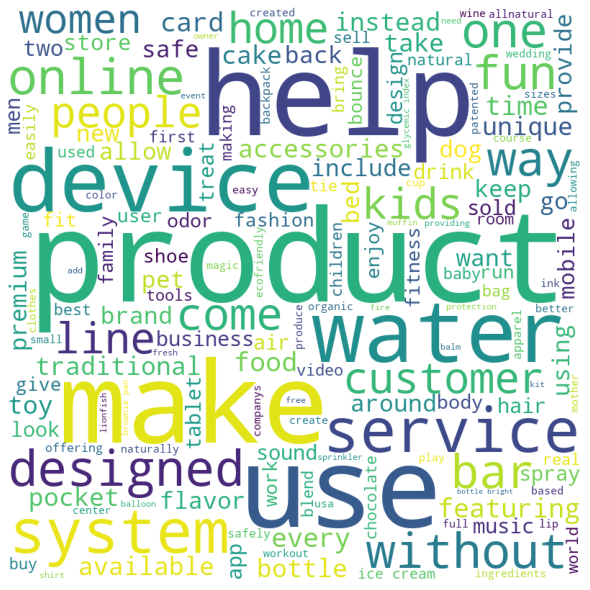

In [24]:
comment_words = ''
stopwords = set(STOPWORDS)
freq =['made','also','company','makes','like','this','even']
df_stf['description'] = df_stf['description'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df_stf['description'].head()
# iterate through the csv file
for val in df_stf.description:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Dataframe with True deals

# Finding number of characters for dataframe with True deals

In [25]:
df_stt['description'] = df_stt['description'].str.replace('[^\w\s]','')
df_stt

C:\Users\Arun\AppData\Local\Temp/ipykernel_32444/203943427.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_stt['description'] = df_stt['description'].str.replace('[^\w\s]','')
C:\Users\Arun\AppData\Local\Temp/ipykernel_32444/203943427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stt['description'] = df_stt['description'].str.replace('[^\w\s]','')


,deal,description
1,True,Retail and wholesale pie factory with two reta...
2,True,Ava the Elephant is a godsend for frazzled par...
5,True,One of the first entrepreneurs to pitch on Sha...
9,True,An educational record label and publishing hou...
10,True,A batteryoperated cooking device that siphons ...
...,...,...
489,True,SynDaver Labs makes synthetic body parts for u...
490,True,Zoom Interiors is a virtual service for interi...
491,True,Spikeball started out as a casual outdoors gam...
492,True,Shark Wheel is out to literally reinvent the w...


Converting all the words to lower case.

In [26]:
df_stt['description'] = df_stt['description'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df_stt

C:\Users\Arun\AppData\Local\Temp/ipykernel_32444/912177106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stt['description'] = df_stt['description'].apply(lambda x: " ".join(x.lower() for x in x.split()))


,deal,description
1,True,retail and wholesale pie factory with two reta...
2,True,ava the elephant is a godsend for frazzled par...
5,True,one of the first entrepreneurs to pitch on sha...
9,True,an educational record label and publishing hou...
10,True,a batteryoperated cooking device that siphons ...
...,...,...
489,True,syndaver labs makes synthetic body parts for u...
490,True,zoom interiors is a virtual service for interi...
491,True,spikeball started out as a casual outdoors gam...
492,True,shark wheel is out to literally reinvent the w...


In [27]:
# creating a copy of dataframe with True deal
df_stt_copy = df_stt.copy()

In [28]:
df_stt_copy ['no.ofcharacters'] = df_stt_copy['description'].str.len()
df_stt_copy

,deal,description,no.ofcharacters
1,True,retail and wholesale pie factory with two reta...,72
2,True,ava the elephant is a godsend for frazzled par...,242
5,True,one of the first entrepreneurs to pitch on sha...,352
9,True,an educational record label and publishing hou...,121
10,True,a batteryoperated cooking device that siphons ...,114
...,...,...,...
489,True,syndaver labs makes synthetic body parts for u...,427
490,True,zoom interiors is a virtual service for interi...,319
491,True,spikeball started out as a casual outdoors gam...,492
492,True,shark wheel is out to literally reinvent the w...,486


# Removing stop words for True dataframe
## Words like ‘also’, ‘made’, ‘makes’, ‘like’, ‘this’, ‘even’ and ‘company’ are to be removed

In [29]:
df_stt['stopwords'] = df_stt['description'].apply(lambda x: len([x for x in x.split() if x in stop]))
df_stt[['description','stopwords']].head()

C:\Users\Arun\AppData\Local\Temp/ipykernel_32444/3730017430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stt['stopwords'] = df_stt['description'].apply(lambda x: len([x for x in x.split() if x in stop]))


,description,stopwords
1,retail and wholesale pie factory with two reta...,3
2,ava the elephant is a godsend for frazzled par...,14
5,one of the first entrepreneurs to pitch on sha...,14
9,an educational record label and publishing hou...,6
10,a batteryoperated cooking device that siphons ...,7


In [30]:
df_stt['description'] = df_stt['description'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df_stt['description'].head()

C:\Users\Arun\AppData\Local\Temp/ipykernel_32444/3514903775.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stt['description'] = df_stt['description'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


1     retail wholesale pie factory two retail locati...
2     ava elephant godsend frazzled parents young ch...
5     one first entrepreneurs pitch shark tank susan...
9     educational record label publishing house desi...
10    batteryoperated cooking device siphons juice s...
Name: description, dtype: object

In [31]:
freq = pd.Series(' '.join(df_stt['description']).split()).value_counts()[:10]
freq

also        42
made        32
makes       32
company     28
like        27
even        27
make        25
designed    19
products    19
way         18
dtype: int64

In [32]:
freq =['made','also','company','makes','like','this','even']

In [33]:
df_stt['description'] = df_stt['description'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df_stt['description'].head()

C:\Users\Arun\AppData\Local\Temp/ipykernel_32444/2555328217.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stt['description'] = df_stt['description'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))


1     retail wholesale pie factory two retail locati...
2     ava elephant godsend frazzled parents young ch...
5     one first entrepreneurs pitch shark tank susan...
9     educational record label publishing house desi...
10    batteryoperated cooking device siphons juice s...
Name: description, dtype: object

# Checking for top frequently occuring words in dataframe with True deal

In [34]:
freq2 = pd.Series(' '.join(df_stt['description']).split()).value_counts()[:10]
freq2

make        25
designed    19
products    19
line        18
easy        18
way         18
without     18
use         17
kids        17
new         15
dtype: int64

In [35]:
from wordcloud import WordCloud

In [36]:
from wordcloud import WordCloud, STOPWORDS

C:\Users\Arun\AppData\Local\Temp/ipykernel_32444/3274645144.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stt['description'] = df_stt['description'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))


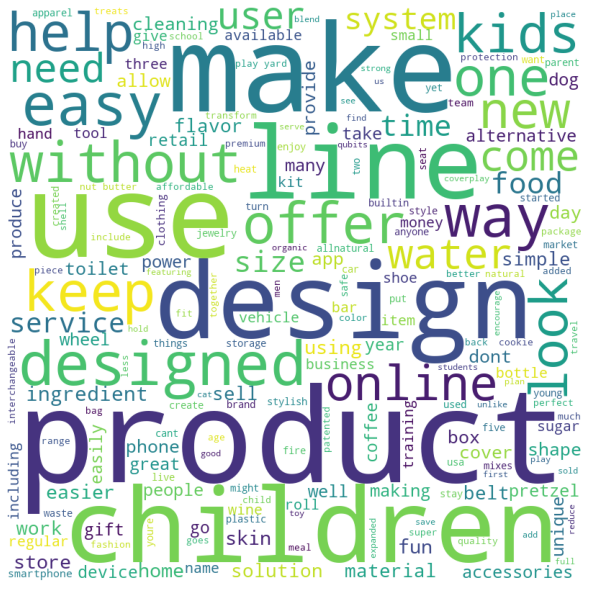

In [37]:
comment_words = ''
stopwords = set(STOPWORDS)
freq =['made','also','company','makes','like','this','even']
df_stt['description'] = df_stt['description'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df_stt['description'].head()
# iterate through the csv file
for val in df_stt.description:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()